# COSADAMA Introduction to Data Science Study

# Week5: [프로젝트1] 시카고 샌드위치 맛집 분석 & [프로젝트2] 셀프 주유소는 정말 저렴할까?

* 참고자료: 2020년 코사다마 데이터 분석커리큘럼(박하람), 파이썬으로 데이터 주무르기(민형기), 점프 투 파이썬(박응용), 파이썬 입문과 크롤링 기초 부트캠프(잔재미코딩)
* 교재: 139 - 166쪽, 169 - 198쪽

이번주차에는 웹크롤링 프로젝트 두 가지를 할 겁니다! 
* BeautifulSoup과 urllib을 이용하여 **시카고 샌드위치 맛집** 분석해보기
* selenium을 이용하여 **셀프 주유소 가격** 알아보기

이렇게 두 가지나 프로젝트를 해야 하니 이번주차에는 시간 분배를 잘 해서 너무 촉박하지 않게 두 프로젝트를 완성할 수 있도록 해보아요!

앗, 시작하기 앞서서 bs4, urllib, selenium이 설치되어 있는지 확인해 주세요. 구글콜랩을 사용하는 분들은 ```pip install``` 했는지 확인해 주세요.

# [프로젝트1] 시카고 샌드위치 맛집 분석

## BeautifulSoup + urllib

웹 크롤링을 활용해 시카고 샌드위치 맛집 분석을 해보려 합니다.
시카고 샌드위치 맛집 분석에서는 샌드위치 맛집의 이름, 샌드위치 이름, 가게의 주소 등의 정보 가져오기를 해 볼 겁니다. 더불어 웹 크롤링을 하여 정보를 가져올 때에는 꽤 시간이 걸리기 때문에 걸리는 시간을 시각화 해 알려주는 tqdm 모듈도 사용해 볼겁니다. 정말 재미있는 부분이라 이번 주차도 신나게 공부할 수 있을 것 같습니다!🐶 그럼 이번 주도 공부 열심히 해봅시다.

### urllib과 BeautifulSoup으로 사이트에 접근하기


urllib과 BeautifulSoup으로 시카고 샌드위치 맛집 랭킹을 알려주는 사이트를 불러와 볼게요. 여기에서는 가게이름, 가게 메인 메뉴, 각 가게 소개 페이지를 가져와 볼거에요. 우선 필요한 모듈들을 모두 import 해봅시다.

In [1]:
import urllib.request # 403 Forbidden 오류해결
from urllib.request import urlopen
from bs4 import BeautifulSoup

* [시카고 샌드위치 맛집 사이트](https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/)
교재에서는 url을 두 부분으로 나누어 놓았어요. 후에 상대주소를 절대주소 바꾸기 위해서 이렇게 하는 것이 필요해요. (자세한 설명은 후에 상대주소/절대주소를 나눌 때 설명할게요.) 이렇게 하고 html을 읽어와 보기로 해요.

In [2]:
url_base = 'https://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub
headers = {'User-Agent': 'Mozilla/5.0'}
res = urllib.request.Request(url, headers =headers)
html = urlopen(res).read()
soup = BeautifulSoup(html, "html.parser")
# soup

잘 불러와졌는지 확인해보는 것을 잊지 말구요. 그 다음 크롬의 개발자 도구(F12)를 확인해 우선 1위의 BLT와 다른 정보들이 담겨있는 태그와 클라스가 무엇인지 확인해봅니다. div 태그에 class는 sammy네요. find_all을 사용해 가져와볼게요.

![](img/week5_img_classtag.png)

개발자 도구를 연 후, 1위인 BLT 부분을 선택하면 해당 부분의 태그와 클라스가 뜬 걸 확인할 수 있네요!

In [3]:
lists = soup.find_all('div', class_='sammy')
# lists

잘 불러와졌네요! 1) 샌드위치 이름 2) 샌드위치 가게 이름 3) 사이트 주소 4) 랭킹까지 모두 들어있죠? 그런데 너무 다양하게 많이 적혀져 있으니, 이름만 우선 get_text()로 모두 가져와 볼게요. for문으로 이를 출력해보겠습니다. len()을 사용해 정확히 50개가 맞는지도 살펴보구요.

In [4]:
for list in lists[:5]: 
    print(list.get_text())


1
BLT
Old Oak Tap
Read more 


2
Fried Bologna
Au Cheval
Read more 


3
Woodland Mushroom
Xoco
Read more 


4
Roast Beef
Al’s Deli
Read more 


5
PB&L
Publican Quality Meats
Read more 



In [5]:
len(lists)

50

lists의 길이가 50개가 맞으니 잘 뽑아낸 것 같습니다.

### 접근한 웹 페이지에서 원하는 데이터 추출, 정리하기

데이터를 가져와 dataframe에 넣어보겠습니다. div의 sammy에서 각각의 정보들을 정확히 꺼내어보죠.



In [6]:
tmp_one = soup.find_all('div', 'sammy')[0]
type(tmp_one)

bs4.element.Tag

In [7]:
tmp_one

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>

첫번째만 가져와서 생각해보면, type이 tag이기 때문에 여기에도 바로 find를 사용할 수 있어요. 여기에 링크가 들어있는 class를 크롬 개발자 도구로 보니 'sammyRank'에요. 가져와서 제대로 뽑아 봤나 볼게요.

In [8]:
tmp_one.find(class_='sammyRank')


<div class="sammyRank">1</div>

그럼 안에 있는 정보만 가져와볼게요.

In [9]:
tmp_one.find(class_='sammyRank').get_text() # .string도 가능

'1'

그 다음으로는 메뉴 이름과 가게 이름을 얻어볼게요. 클라스 이름이 'sammyListing'이네요. (크롬 개발자 도구로 반드시 태그를 확인해보세요!)

In [10]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\nOld Oak Tap\nRead more '

엇, 나오긴 나왔는데 우리가 의도한대로 나오지 않았네요, 아주 조금 있다가 보기로 해요. 지금은 그 다음 url 주소를 확인해봅시다. 아래를 보면, 이건 get_text로 얻을 수 있는게 아니라 a 태그의 href에 들어있어요.
그러니까 get_text가 아니라 a 속의 href를 추출하면 바로 url 주소를 얻을 수 있겠죠?

In [11]:
tmp_one


<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>

뭔가 이상하게 바로 url이 구해지는 게 아니라 다른 게 나왔죠? 
그래서 가져올 때는 이렇게 아래와 같이 가져와야 합니다.

In [12]:
tmp_one.find('a')['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

앗, 그런데 주소가 끊겨서 나왔네요. 앞 부분의 주소( https://www.chicagomag.com)가 생략되어 있죠?
이렇게 적혀있는 부분들을 '상대주소'라고 해요. 상대주소와 달리 주소가 모두 적혀져 있어 사이트로 바로 연결되는 주소를 '절대주소'라고 하구요.
나중에 상대주소를 절대주소로 바꾸어주는 작업이 필요하겠네요!

다시 돌아가, 아까 제대로 샌드위치 이름과 가게 이름을 구해 봅시다.



In [13]:
tmp_one.find(class_='sammyListing').get_text()

'BLT\nOld Oak Tap\nRead more '

### 정규 표현식 활용해 데이터 가공하기


구조를 보면 맨 앞에가 샌드위치 이름, 중간이 샌드위치 가게 이름이네요. 이를 분리하기 위해서 우리는 지난 시간에 배운 '정규 표현식'을 활용해 볼 겁니다.

In [14]:
import re 

tmp_string = tmp_one.find(class_='sammyListing').get_text()

re.split('\r\n|\n', tmp_string)

['BLT', 'Old Oak Tap', 'Read more ']

정규표현식이 기억나지 않는다면, 다시 돌아가 봐야겠죠? \r\n과 \n 둘 중 하나라도 있으면 split 해줘라 라고 명령을 해줬습니다. 잘 분리를 해줬네요ㅎㅎ 리스트로 담겨져 있으니까 아래와 같이 샌드위치 이름과 가게 이름을 분리하면 됩니다.

In [15]:
# 샌드위치 이름
re.split('\r\n|\n', tmp_string)[0]

'BLT'

In [16]:
# 샌드위치 가게 이름
re.split('\r\n|\n', tmp_string)[1]

'Old Oak Tap'

### 절대경로와 상대경로

앞서 상대경로, 절대경로에 대한 설명을 잠깐 드렸는데요. 더 정확하게 이해를 하기 위해서 샌드위치 페이지에 있는 모든 url들을 가져와 볼게요.

In [17]:
# 상대경로와 절대경로 - 그냥 검은색으로 되어 있는 부분은 상대경로, 링크로 되어 있는 것은 절대경로 
address_all = soup.find_all('div', 'sammy')
for item in address_all[:15]: 
    print(item.find('a')['href'])

/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/
/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/
/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/
/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/
/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/
https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Hendrickx-Belgian-Bread-Crafter-Belgian-Chicken-Curry-Salad/
/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Acadia-Lobster-Roll/
/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Birchwood-Kitchen-Smoked-Salmon-Salad/
/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Cemitas-Puebla-Atomica-Cemitas/
/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Nana-Grilled-Laughing-Bird-Shrimp-and-Fried-Oyster-Po-Boy/
https://www.chicagomag.com/Chicago-Magazine/November-201

15줄만 뽑아 보았는데, 여기서 상대경로로 된 부분들이 많죠? 이것 이용해 바로 사이트를 열려면, 앞에 https://www.chicagomag.com 을 붙여주어야 합니다. 이렇게 묶어주기 위해서 urllib에 있는 urljoin을 사용할 거에요. 이 함수는 절대 경로라면 냅두고, 상대경로에만 앞의 주소를 붙여서 절대 경로로 전환시켜줘요.

In [18]:
from urllib.parse import urljoin

urljoin('https://www.chicagomag.com', item.find('a')['href'])

'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Longman-and-Eagle-Wild-Boar-Sloppy-Joe/'

그러면 이제 모든 정보들을 가져와 보겠습니다.



In [19]:
rank = []
main_menu = []
cafe_name = []
url_add =[]

list_soup = soup.find_all('div', 'sammy')

for item in list_soup:
    rank.append(item.find(class_='sammyRank').get_text())
    
    tmp_string = item.find(class_='sammyListing').get_text()
    
    main_menu.append(re.split(('\n|\r\n'), tmp_string)[0])
    cafe_name.append(re.split(('\n|\r\n'), tmp_string)[1])
    
    url_add.append(urljoin(url_base, item.find('a')['href']))

제대로 가져와졌는지 확인을 해보겠습니다.

In [20]:
rank[:5]

['1', '2', '3', '4', '5']

In [21]:
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [22]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [23]:
url_add[:5]

['https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

개수도 50개가 맞는지 확인해 볼게요!

In [24]:
len(rank), len(main_menu), len(cafe_name), len(url_add)

(50, 50, 50, 50)

### DataFrame에 정보 담기


이렇게 웹 크롤링을 통해 구한 정보들을 모두 데이터 프레임에 담아 둡시다. 이제는 pandas의 DataFrame이 친숙하죠?ㅎㅎ

In [25]:
import pandas as pd 

data = {'Rank': rank, 'Menu':main_menu, 'Cafe':cafe_name, 'URL':url_add}
df = pd.DataFrame(data)
df.head()

,Rank,Menu,Cafe,URL
0,1,BLT,Old Oak Tap,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Fried Bologna,Au Cheval,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Woodland Mushroom,Xoco,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Roast Beef,Al’s Deli,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,PB&L,Publican Quality Meats,https://www.chicagomag.com/Chicago-Magazine/No...


예히, 정보들이 잘 담겼네요. 우리가 원하는 칼럼 순으로 정보를 저장해주려면 아래와 같이 하면 됩니다.

In [26]:
df = df[['Rank','Cafe','Menu','URL']]
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...


잘 되었으니, 이를 우리 csv에다 저장해 둡니다. 이렇게 중간 저장을 잘 해놓지 않으면, 정보가 날라가 버리는 것은 당연하고, 웹 크롤링하는데 시간이 너무 많이 걸리면 다시 하기가 또 곤란해져요. 그러니 중간 저장을 습관화 해두는 것이 좋습니다.

In [27]:
df.to_csv('03. best_sandwiches_list_chicago.csv', sep=',', encoding='utf-8')

이렇게 무사히 저장까지 해보았습니다.

### 다수의 웹페이지에서 정보 가져오기

여기까지는 가게 이름, 가게의 샌드위치 이름, 정보들이 더 담겨있는 url 주소까지 모두 확인해보았습니다.

* [Old Oak Tap BLT](https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/)

이 페이지를 살펴보면, 아래에 '가격'과 '주소'가 적혀져 있습니다. 그러니 여기에서 각각 가격과 주소를 얻어보도록 하겠습니다. 또 개발자 도구를 사용해 이 정보가 들어있는 태그를 확인해봅시다. 보니 p 태그에 addy class네요.

우선 그 전에 우리가 저장한 csv 파일을 불러와보겠습니다. 필요한 모듈들도 함께 뽑아와 보구요.

In [28]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen 
import pandas as pd

df = pd.read_csv('03. best_sandwiches_list_chicago.csv', encoding='utf-8', index_col=0)
df.head()

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...


첫번째 사이트부터 들어가보면, 아까 들어있는 태그가 p 태그에 addy class죠?

In [29]:
df['URL'][0]

'https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

In [30]:
headers = {'User-Agent': 'Mozilla/5.0'}
res = urllib.request.Request(df['URL'][0], headers =headers)
html = urlopen(res).read()
soup = BeautifulSoup(html, "html.parser")

# soup

여기에서 가격과 주소가 들어있는 곳만 뽑아와 보면!

In [31]:
soup.find('p', class_='addy')

<p class="addy">
<em>$10. 2109 W. Chicago Ave., 773-772-0406, <a href="http://www.theoldoaktap.com/">theoldoaktap.com</a></em></p>

In [32]:
price_tmp = soup.find('p', class_='addy').get_text()
price_tmp

'\n$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com'

이 정보를 또 쪼개봐야지요.

In [33]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [34]:
price_tmp.split()[0]

'$10.'

가격에 .이 붙어있으니까 점을 없애보죠.

In [35]:
price_tmp.split()[0][:-1]

'$10'

그럼 이제는 주소를 한 번 봅시다. 이것을 보면, 항상 뒤에서 두개를 제외하고까지가 주소인 것을 알 수 있습니다. (다른 주소들도 확인해보세요.)

In [36]:
price_tmp.split()

['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']

In [37]:
# 주소만 가져오기
price_tmp.split()[1:-2]

['2109', 'W.', 'Chicago', 'Ave.,']

주소만 가져와봤는데, 이것이 다 따로따로 떨여져 있죠? 이것을 하나로 합하려면 join 함수를 사용하면 됩니다.

* [파이썬 join 함수](https://wikidocs.net/13#join)


In [38]:
' '.join(price_tmp.split()[1:-2])

'2109 W. Chicago Ave.,'

그럼 이제 주소는 해결이 됐고, 가격과 주소가 잘 뽑아지는지 3개만 뽑아서 확인을 해보겠습니다.


In [39]:
price = []
address =[]

for n in df.index[:3]:
    res = urllib.request.Request(df['URL'][n], headers =headers)
    html = urlopen(res).read()
    soup_tmp = BeautifulSoup(html, "html.parser")

    gettings = soup_tmp.find('p', 'addy').get_text()
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2]))

In [40]:
price

['$10', '$9', '$9.50']

In [41]:
address

['2109 W. Chicago Ave.,', '800 W. Randolph St.,', '445 N. Clark St.,']

잘 나오네요!

### tqdm 모듈을 사용해 50 페이지에 접근하기

tqdm은 웹 크롤링할 때 상태 진행이 어떻게 되는지 알려주는 바형태의 시각화입니다. 앞서 뽑아낼 정보들이 50페이지를 모두 확인해보면서 추출하는 것이기 때문에 이렇게 얼마나 진행되었는지 알려주는 것이 있으면, 더 편하게 정보를 얻을 수 있겠죠.

* terminal에서 conda install -c conda-forge tqdm 해주기


아래와 같이 tqdm을 import 해주고, 앞서 한 대로 50 페이지를 모두 들어가 가격과 주소를 가져와 보도록 하죠. (코드를 그냥 쓰기 전에 먼저 코드를 어떻게 쓸 지 생각해보고 보는 것이 좋습니다)

In [42]:
from tqdm import tqdm_notebook

price = []
address = []

for n in tqdm_notebook(df.index): 
    res = urllib.request.Request(df['URL'][n], headers =headers)
    html = urlopen(res).read()
    soup_tmp = BeautifulSoup(html, "html.parser")

    gettings = soup_tmp.find('p', 'addy').get_text()
    price.append(gettings.split()[0][:-1])
    address.append(' '.join(gettings.split()[1:-2]))


<ipython-input-42-1cc37d5c9b5c>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(df.index):


  0%|          | 0/50 [00:00<?, ?it/s]

정말 오래 걸리죠? 제대로 가져와봤는지 확인해봅시다. (제대로 안 됐으면 완전 짱나겠죠ㅎㅎ)

In [43]:
price[:10]

['$10', '$9', '$9.50', '$9.40', '$10', '$7.25', '$16', '$10', '$9', '$17']

In [44]:
address[:30]

['2109 W. Chicago Ave.,',
 '800 W. Randolph St.,',
 '445 N. Clark St.,',
 '914 Noyes St., Evanston,',
 '825 W. Fulton Mkt.,',
 '100 E. Walton',
 '1639 S. Wabash Ave.,',
 '2211 W. North Ave.,',
 '3619 W. North Ave.,',
 '3267 S. Halsted St.,',
 '2537 N. Kedzie Blvd.,',
 'Multiple',
 '3124 N. Broadway,',
 '3455 N. Southport Ave.,',
 '2657 N. Kedzie Ave.,',
 '1120 W. Grand Ave.,',
 '1141 S. Jefferson St.,',
 '333 E. Benton Pl.,',
 '1411 N. Wells St.,',
 '1747 N. Damen Ave.,',
 '3209 W. Irving Park',
 'Multiple',
 '5347 N. Clark St.,',
 '2954 W. Irving Park Rd.,',
 'Multiple',
 '191 Skokie Valley Rd., Highland Park,',
 'Multiple',
 '1818 W. Wilson Ave.,',
 '2517 W. Division St.,',
 '218 W. Kinzie']

어, 그런데 여기 multiple이란게 있죠. 샌드위치 가게가 체인점이라 여러군데에 있나봐요. 일단 이것을 알아두시고 어떻게 처리할 지 고민을 해봅시다.

In [45]:
len(price), len(address)

(50, 50)

와핫, 다 잘 가져온 것 같네요. (여러분들은 price와 address를 모두 확인해보세요~) 이 정보들을 데이터프레임에 새로운 컬럼에 넣어볼게요.

In [46]:
df['Price'] = price 
df['Address'] = address

df.head()

,Rank,Cafe,Menu,URL,Price,Address
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"2109 W. Chicago Ave.,"
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,"800 W. Randolph St.,"
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,"445 N. Clark St.,"
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston,"
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"825 W. Fulton Mkt.,"


유후, 잘 됐구요! 깔끔하게 Rank를 index로 넣어봅시다.

In [47]:
df.set_index('Rank', inplace=True)
df.head()

,Cafe,Menu,URL,Price,Address
Rank,,,,,
1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"2109 W. Chicago Ave.,"
2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,"800 W. Randolph St.,"
3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,"445 N. Clark St.,"
4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston,"
5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"825 W. Fulton Mkt.,"


그러면 이 크롤링한 정보들을 잘 예쁘게 저장!합시다. 
다 해놓고 저장을 까먹으면 안 되겠죠?

In [48]:
df.to_csv('03. best_sandwitches_list_chicago2.csv', sep=',', encoding='utf-8')

# [프로젝트2] 셀프 주유소는 정말 저렴할까?

## selenium

앞에서는 urllib을 사용했는데요, 이번에는 urllib으로 크롤링 할 수 없는 사이트들을 selenium을 사용해 크롤링해보려 합니다.

이번 프로젝트는 '셀프 주유소는 정말로 저렴한지'를 팩트 체크해보는 것입니다. 한국석유공사 오피넷에서 selenium으로 데이터를 크롤링해볼 것이구요, 엑셀파일에 담아 glob 모듈을 활용해 다수의 엑셀파일을 위치를 찾아 읽어보는 것까지 해볼 겁니다. 이번 주차도 매우 흥미로운 주제이나, 다만 Selenium을 활용하는 것이 어려울 수 있어요. 그러니 궁금한 것이나 막히는 부분이 있다면 언제든 슬랙으로 질문해주세요! 그럼 이번 주차 공부도 시작합니다🐻



### selenium 사용하기

이전 프로젝트에서는 urllib을 활용해서 정보를 가져왔어요. 하지만 이번에는 urllib 라이브러리를 사용해 크롤링할 수 없기 때문에 이 때 사용하는 selenium를 배워보려고 합니다.

현재 교안은 jupyter notebook 기준으로 작성되었습니다. 따라서 colab으로 실습하는 경우 driver 설정하는 부분이 조금 다릅니다. 코드를 진행하는데는 큰 차이가 없습니다. 하지만 selenium은 jupyter notebook으로 공부하시는걸 추천드려요. colab은 따로 설정이 필요하고, 실습 시 크롤링하는 창이 새로 지원되지 않기 때문입니다:( 크롤링을 했는데 코드대로 드라이버가 실행되는 모습을 볼 수 없다는 의미죠.

그럼에도 불구하고 colab으로 진행하려고 한다면 driver 설정을 다음과 같이 수정하시면 됩니다.

In [50]:
# step1
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

# step2
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# step3
driver = webdriver.Chrome('chromedriver',options=options)

zsh:1: command not found: apt-get
The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.

cp: /usr/lib/chromium-browser/chromedriver: No such file or directory


주유소 가격과 위치를 끌어오려면, 주유소 정보들이 있는 opinet 사이트를 이용할 수 있습니다.

* [opinet - 싼 주유소 찾기 - 지역별](https://www.opinet.co.kr/searRgSelect.do): 이 페이지를 선택하면 opinet 사이트가 나올 것이에요. 여기에서 싼 주유소 찾기를 누르고, 지역별을 누르면 우리가 얻고자 하는 사이트가 나와요.

그런데 문제는 이렇게 지역별 사이트에 들어가도, url 주소가 달라지지 않았기 때문에 해당 url을 복사해 다시 로드하면 Opinet 처음 사이트로 돌아가게 된답니다. 그럴 때에는 url 주소만 있으면 되는 urllib를 사용할 수 없겠죠. 그렇게 해서 사용하는 것이 바로 selenium입니다.

### selenium 설치와 웹 드라이버


Selenium은 터미널에 pip로 설치하시면 됩니다. 그러나 Selenium을 사용하기 위해서는 사용하는 브라우저에 맞춰 웹 드라이버를 다운 받아야 해요. 본인이 사파리를 쓰시면 사파리 웹 드라이버를, 크롬을 쓰시는 크롬 웹 드라이버를 쓰시면 돼요. 저는 크롬 드라이버가 더 깔기 편해서 크롬 드라이버를 추천드려요.

* pip install selenium 터미널에 입력
* [본인에게 맞는 웹브라우저 별로 드라이브 설치 - 경로설정 주의](https://sacko.tistory.com/13)

웹 브라우저를 다운받으신 후, data나 소스코드가 있는 폴더에 drive를 압축 해제해주시면 된답니다.(교재 171쪽) 이 때 파일경로가 중요한데요, 파일경로를 확인하는 방법은 아주 간단하게 Terminal(명령 프롬프트)을 열고 drive 파일을 터미널에 끌어 올려다 넣으시면 이동경로가 나타나게 됩니다. 아래 분홍색이 이동경로에요. 윈도우 사용하시는 분들은 아래쪽 이미지 흰 부분을 사용하시면 됩니다.('>' 앞부분은 제거해주기!)

![](img/week5_img1_ios.png)

![](img/week5_img1_window.png)

이동경로를 기억해 두시고 먼저 selenium을 import 해보겠습니다.

In [51]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [52]:
from selenium import webdriver

### 서울시 구별 주유소 가격 정보 얻기

* [opinet - 싼 주유소 찾기 - 지역별](https://www.opinet.co.kr/searRgSelect.do)

지역별 주소 사이트를 selenium으로 들어가려면 어떻게 해야 할까요? 아래와 같이 하면 됩니다.

이동경로를 아래에다 넣어주고, get에다가는 원하는 사이트의 주소를 입력합니다.
```'chromedriver'``` 부분은 본인의 chromedriver가 있는 디렉토리 주소를 넣어주면 됩니다.

In [54]:
driver = webdriver.Chrome('chromedriver')
driver.get("http://www.opinet.co.kr/searRgSelect.do")
driver.get("http://www.opinet.co.kr/searRgSelect.do") # 두번 해야 들어가 짐.

![](img/week5_img2.png)

opinet에 들어갔는데 경기도가 기본으로 세팅되어 있네요? 우리는 서울 주유소 기름값을 알아보려고 하니까 서울로 설정해 줍시다. 개발자도구에서 xpath를 확인해서 서울로 바꾸는 코드는 다음과 같습니다. 직접 한번 xpath가 어떻게 설정되어 있는지, 어떤 tag에 걸려 있는지 확인해 보세요!

In [55]:
# 시/도를 선택하는 박스의 xpath
si_list_raw = driver.find_element_by_xpath("""//*[@id="SIDO_NM0"]""")

In [56]:
si_list = si_list_raw.find_elements_by_tag_name('option')
si_list[:5]

[<selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="1b7199df-4837-4ba0-989a-4e701b7fd9bf")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="c02c0681-25fc-49ea-8e65-9a5ce52f30fa")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="3c84c505-9e98-4b30-928b-cb9da9b4bdff")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="799d88bc-e60d-4e3c-8395-8cb65e76f8ac")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="878e0dcc-1b80-47a8-9ae3-3f2233b93bb3")>]

In [57]:
si_names = [option.get_attribute('value') for option in si_list]
si_names.remove('')

In [58]:
# 시/군 첫번째=서울로 바꿔주기
element = driver.find_element_by_id("SIDO_NM0")
element.send_keys(si_names[0])

짜잔! 이렇게 두번 해주면 지역별 사이트에 들어갈 수 있어요.

![](img/week5_img3.png)

서울시 구별로 정보를 얻어올 것이니, 빨간색 박스 마포구라 적혀져 있는 곳을 바꾸어줘야겠고, 바꾼 결과로 조회 버튼까지 눌러줘야겠지요. 또 아래처럼 엑셀 저장 버튼까지 눌러줘야 엑셀로 결과가 저장되겠죠.

그럼 우선 '구' 버튼부터 눌르며 바꿔보죠. 이 때 필요한 것이 xpath에요. 크롬 개발자 도구로 해당 구 버튼의 xpath를 copy하고요, 확보한 xpath를 이용해 element를 찾고 gu_list_raw 변수에 저장합니다.

* [selenium 문법](https://github.com/SeongJaeMoon/PracPython/blob/master/selenium_dom_selector.md)

In [59]:
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")

그 다음에는 구 이름이 option이라는 태그에 저장되어 있으니까, 아래와 같이 option이라는 태그를 찾아 줍니다.

In [60]:
gu_list = gu_list_raw.find_elements_by_tag_name("option")
gu_list[:5]

[<selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="82f0d939-00e8-4b23-80bc-0947fa2449b8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="7788c07c-3216-4791-8522-283543c5afc4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="3c10c371-3d79-4e23-914e-f0aea96d81ba")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="d9fbe3bc-d760-43b0-8333-beee746f99c4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="18b549bd12df9b8cd57b03e2ee07d74c", element="e4fafd22-d3be-4a80-a4fc-f6f1d7f24fac")>]

이것처럼 gu_list에는 우리가 원한게 잘 보이지 않죠? 구 이름은 option의 value라는 곳에 있었으니까요, value를 아래와 같이 가져옵니다.

In [61]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')  # 이것을 넣었다 빼보세요. 어떤 기능인지 알 수 있습니다.
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [62]:
len(gu_names)

25

리스트로 구성되어 있죠? 총 구가 25이네요. 이후 엑셀 파일이 총 25개가 다운로드 되었는지 확인하셔야 해요. 구 이름이 있는 태그에 gu_names에서 첫번째 것만 한번 입력해보도록 할게요.

In [63]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

![](img/week5_img6.png)

저렇게 강남구로 바뀌었죠? 그러면 이제는 조회버튼을 눌러야 되겠네요. 그럼 조회 버튼은 또 xpath를 사용해 클릭해주면 됩니다. (조회버튼 xpath copy하는 것 잊지 마세요!)

In [64]:
#조회버튼의 Xpath를 찾아서 클릭
xpath ='''//*[@id="searRgSelect"]/span'''
element_sel_gu = driver.find_element_by_xpath(xpath).click()

![](img/week5_img7.png)

이렇게 바뀌었다면, okay! 이제는 엑셀을 얻어야 하니까, 또 xpath를 알아내서 엑셀 저장 버튼을 클릭하면 되겠죠!

In [65]:
xpath ='''//*[@id="glopopd_excel"]/span'''
element_get_excel = driver.find_element_by_xpath(xpath).click()

그러면 웹 브라우저에서 다운로드 시 사용되는 폴더에서 '지역_위치별(주유소)'가 생성된 것을 확인할 수 있을 겁니다.

그렇다면 이제 알았으니, 전체 구들의 엑셀 파일을 모두 가져와봅시다. 시간이 꽤 오래 걸리는 작업일 것이기 때문에 tqdm을 사용해서 걸리는 시간을 시각화 해볼 것이구요. 어떻게 코드가 구성될지 한번 생각해보신다음 아래 코드를 확인하세요!

In [66]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names): 
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2) # 중간중간 기다리라는 time.sleep 명령 
    
    xpath ='''//*[@id="searRgSelect"]/span'''
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath ='''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

<ipython-input-66-8d7a2744fb60>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

![](img/week5_img8.png)

이렇게 총 25개의 파일이 다운로드되어 있으면 됩니다. 그럼 이제 웹 드라이버를 종료하면 끝!

In [67]:
driver.close()

### 구별 주유 가격에 대한 데이터의 정리

이제는 구별 주유 가격에 대한 데이터를 정리해보려 합니다. 이제는 정말 익숙해진 pandas를 활용하여 이것저것 요리해부죠. 우선 다운로드 폴더에 담겨져 있는 엑셀 파일을 본인의 코드가 적혀있는 파일에다 옮깁니다. 저는 새롭게 data라는 폴더를 모두 담아서 거기다 넣어놨어요.

#### glob으로 원하는 파일 쉽게 가져오기

원하는 파일을 가져오려면 파일경로가 필요합니다. 쉽게 파일을 가져올 수 있도록 해주는 모듈이 glob이에요. 해당 모듈들을 import 해보겠습니다.

In [68]:
import pandas as pd 
from glob import glob

* [glob의 간단한 사용법](https://wikidocs.net/83)

glob을 이용하면 쉽게 파일들을 가져올 수 있어요. 아래 *는 지역으로 시작하는 것은 모두 가져오라는 거에요. 지역 뒤의 이름은 상관이 없는거죠.

In [69]:
glob('data/지역*.xls')

['data/지역_위치별(주유소) (9).xls',
 'data/지역_위치별(주유소) (12).xls',
 'data/지역_위치별(주유소) (5).xls',
 'data/지역_위치별(주유소) (24).xls',
 'data/지역_위치별(주유소) (4).xls',
 'data/지역_위치별(주유소) (13).xls',
 'data/지역_위치별(주유소) (8).xls',
 'data/지역_위치별(주유소) (3).xls',
 'data/지역_위치별(주유소) (18).xls',
 'data/지역_위치별(주유소) (22).xls',
 'data/지역_위치별(주유소) (14).xls',
 'data/지역_위치별(주유소) (15).xls',
 'data/지역_위치별(주유소) (23).xls',
 'data/지역_위치별(주유소) (19).xls',
 'data/지역_위치별(주유소) (2).xls',
 'data/지역_위치별(주유소) (20).xls',
 'data/지역_위치별(주유소) (1).xls',
 'data/지역_위치별(주유소) (16).xls',
 'data/지역_위치별(주유소) (17).xls',
 'data/지역_위치별(주유소) (21).xls',
 'data/지역_위치별(주유소) (10).xls',
 'data/지역_위치별(주유소).xls',
 'data/지역_위치별(주유소) (7).xls',
 'data/지역_위치별(주유소) (6).xls',
 'data/지역_위치별(주유소) (11).xls']

In [70]:
len(glob('data/지역*.xls'))

25

25개도 맞네요. 그럼 이것들을 모두 가져와서 file에다 저장해 보겠습니다.

In [71]:
stations_files = glob('data/지역*.xls')
stations_files

['data/지역_위치별(주유소) (9).xls',
 'data/지역_위치별(주유소) (12).xls',
 'data/지역_위치별(주유소) (5).xls',
 'data/지역_위치별(주유소) (24).xls',
 'data/지역_위치별(주유소) (4).xls',
 'data/지역_위치별(주유소) (13).xls',
 'data/지역_위치별(주유소) (8).xls',
 'data/지역_위치별(주유소) (3).xls',
 'data/지역_위치별(주유소) (18).xls',
 'data/지역_위치별(주유소) (22).xls',
 'data/지역_위치별(주유소) (14).xls',
 'data/지역_위치별(주유소) (15).xls',
 'data/지역_위치별(주유소) (23).xls',
 'data/지역_위치별(주유소) (19).xls',
 'data/지역_위치별(주유소) (2).xls',
 'data/지역_위치별(주유소) (20).xls',
 'data/지역_위치별(주유소) (1).xls',
 'data/지역_위치별(주유소) (16).xls',
 'data/지역_위치별(주유소) (17).xls',
 'data/지역_위치별(주유소) (21).xls',
 'data/지역_위치별(주유소) (10).xls',
 'data/지역_위치별(주유소).xls',
 'data/지역_위치별(주유소) (7).xls',
 'data/지역_위치별(주유소) (6).xls',
 'data/지역_위치별(주유소) (11).xls']

#### 25개 파일 병합하기

pandas로 가공하려면 우선 이 25개의 파일들을 하나의 DataFrame에 담아야 하겠죠? 이를 모두 병합하기 위해서 열 방향으로 합쳐지는 concat 함수를 이용할 겁니다.

In [72]:
# 25개의 DataFrame이 담길 리스트
tmp_raw = []

for file_name in stations_files:
    # 한 개씩 DataFrame을 불러오기
    tmp = pd.read_excel(file_name, header=2)
    # tmp_raw에다 추가하기
    tmp_raw.append(tmp)
    
# 25개의 DataFrame 병합하기    
station_raw = pd.concat(tmp_raw)
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),현대오일뱅크,02-954-4555,Y,1898,1665,1487,-
1,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1669,1492,1170
2,서울특별시,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),SK에너지,02-992-5561,Y,-,1671,1493,1200
3,서울특별시,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),현대오일뱅크,02-3492-7371,Y,-,1695,1523,-
4,서울특별시,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),S-OIL,02-3491-3454,Y,-,1695,1525,-


이제 우리에게 익숙한 데이터프레임이네요. 여기에는 지역, 상호, 주소, 상표, 셀프여부, 휘발유 값 등이 들어있네요. 우리가 이번에 할 프로젝트의 주제는 셀프 주유소가 정말로 싼지 아닌지 팩트체크를 해보는 것이었잖아요. 그러니까 여기에서 중요한 컬럼은 셀프여부가 되겠구요, 구별로 알아보려고 했으니 주소가 중요할 겁니다. (지역은 모두 서울이라 필요가 없어요.) 이렇게 데이터의 특성을 파악하는게 중요하고요. 전반적으로 어떻게 담겨있는지 알기 위해서 아래를 확인해보았습니다.

In [73]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      471 non-null    object
 1   상호      471 non-null    object
 2   주소      471 non-null    object
 3   상표      471 non-null    object
 4   전화번호    471 non-null    object
 5   셀프여부    471 non-null    object
 6   고급휘발유   471 non-null    object
 7   휘발유     471 non-null    object
 8   경유      471 non-null    object
 9   실내등유    471 non-null    object
dtypes: object(10)
memory usage: 40.5+ KB


중요한 컬럼이 휘발유라고 했죠? 휘발유 값만 알아볼 것인데 이게 숫자가 아닌 object로 되어 있어서 숫자형으로 바꾸어줘야 계산이 가능하겠죠. 이를 후에 처리해줘야겠죠.

필요한 컬럼들만 추려서 stations에 담아볼게요. 중요한 것이 1) 상호 2) 주소 3) 휘발유 4) 셀프여부 5) 상호니까 이것들만 남겨보겠습니다.

In [74]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665,Y,현대오일뱅크
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669,N,현대오일뱅크
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671,Y,SK에너지
3,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),1695,Y,현대오일뱅크
4,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1695,Y,S-OIL


#### 데이터 가공하기

이제는 주소에서 구만 뽑아서 저장해줘야겠죠. 주소에서 구만 가져올 거에요. split을 사용해 쉽게 가져오면 됩니다. 새로운 컬럼 구에다 담아주었어요.

In [75]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665,Y,현대오일뱅크,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669,N,현대오일뱅크,도봉구
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671,Y,SK에너지,도봉구
3,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),1695,Y,현대오일뱅크,도봉구
4,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1695,Y,S-OIL,도봉구


25개의 구가 모두 잘 추출되었는지 확인하기 위해서는 아래와 같이 unique()를 통해 확인할 수 있습니다.

In [76]:
stations['구'].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object)

이상하게 추출된 구도 없고, 대충 다 담긴 것 같은데, 총 25개인지 확인해보는게 좋을 것 같네요.

In [77]:
len(stations['구'].unique())

25

그 다음엔 가격들을 전반적으로 살펴보도록 할게요. false 밖에 없다는 말은 결측값이 없다는 말인데, 결측값이 없다고 다 된걸까요?

In [78]:
stations['가격'].isnull().value_counts()

False    471
Name: 가격, dtype: int64

In [79]:
stations['가격'].unique()

array([1665, 1669, 1671, 1695, 1698, 1705, 1709, 1712, 1715, 1716, 1723,
       1742, 1745, 1749, 1773, 1727, 1729, 1737, 1768, 1769, 1789, 1799,
       1919, 1989, '1699', '1709', '1715', '1719', '1724', '1727', '1739',
       '1749', '1767', '1795', '1798', '-', 1697, 1708, 1710, 1735, 1738,
       1758, 1718, 1719, 1759, 1823, 1824, 1859, 1680, 1707, 1713, 1717,
       1733, 1748, 1688, 1725, 1765, 1820, 1880, 1888, 1678, 1685, 1689,
       1699, 1703, 1736, 1740, 1747, 1756, 1760, 1775, 1779, 1785, 1795,
       1798, 1828, 1953, 2029, 1663, 1679, 1694, 1696, 1751, 1778, 1829,
       1927, 2098, 2190, 2198, 2215, 1659, 1734, 1767, 1771, 1781, 1788,
       1838, 1841, 1843, 1898, 1929, 1995, 1997, 2058, 2277, 1711, 1728,
       1797, 1808, 1819, 1840, 1947, 1998, 2032, '1765', '1818', '1917',
       '2038', '2098', '2196', '2354', '2389', '2571', '1678', '1687',
       '1688', '1694', '1697', '1698', '1717', '1718', '1735', '1738',
       '1755', '1759', '1775', '1897', '1945', '2090

중간에 '-'가 보이시죠? '-'로 가격정보가 없는 것을 저렇게 표시해놨네요. 어떤 행이 가격 정보가 없는 것인지 불린 인덱싱을 사용해서 알아볼게요.

In [80]:
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
34,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
35,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
36,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL,강남구


총 7개의 주유소에서 가격이 없군요. 이 row를 없애도록 하겠습니다.

In [81]:
stations = stations[stations['가격'] != '-']
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구


잘 지워졌네요.

In [82]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  464 non-null    object
 1   주소         464 non-null    object
 2   가격         464 non-null    object
 3   셀프         464 non-null    object
 4   상표         464 non-null    object
 5   구          464 non-null    object
dtypes: object(6)
memory usage: 25.4+ KB


가격이 아직도 숫자가 아닌 object니 수정해보도록 하겠습니다.

In [83]:
stations['가격'] = stations['가격'].astype('float')
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 9
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  464 non-null    object 
 1   주소         464 non-null    object 
 2   가격         464 non-null    float64
 3   셀프         464 non-null    object 
 4   상표         464 non-null    object 
 5   구          464 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.4+ KB


잘 변경 됐네요! 이 정도로 데이터를 가공하면 된 것 같습니다.

### boxplot으로 셀프 주유소 가격 시각화

저번에 boxplot에 대해 배워봤을 겁니다. 그만큼 boxplot은 데이터의 전반적인 수치들을 확인하기에 편리한 시각화에요. 셀프 주유소가 정말로 저렴한지 boxplot으로 시각화해보겠습니다. 우선 matplotlib의 한글 문제를 처리하고 필요한 모듈들을 import 할게요.

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

셀프 유무에 따른 가격을 확인해보겠습니다.

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

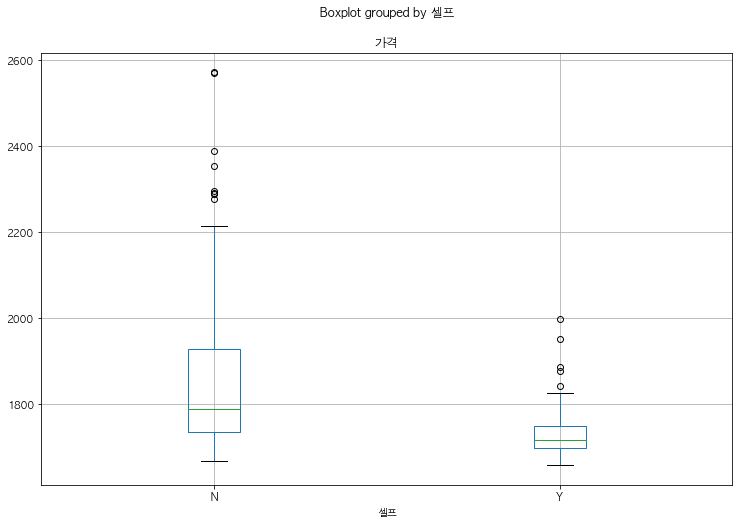

In [85]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

확실히 셀프 주유소가 싼 가격이란게 보이죠? 검은색 점들은 이상치라는 거고, 평균도 셀프주유소가 훨씬 낮고, 전반적으로 셀프 주유소가 더 싼 것을 알 수 있습니다.

이제는 상표에 따라서 boxplot을 시각화해볼게요.

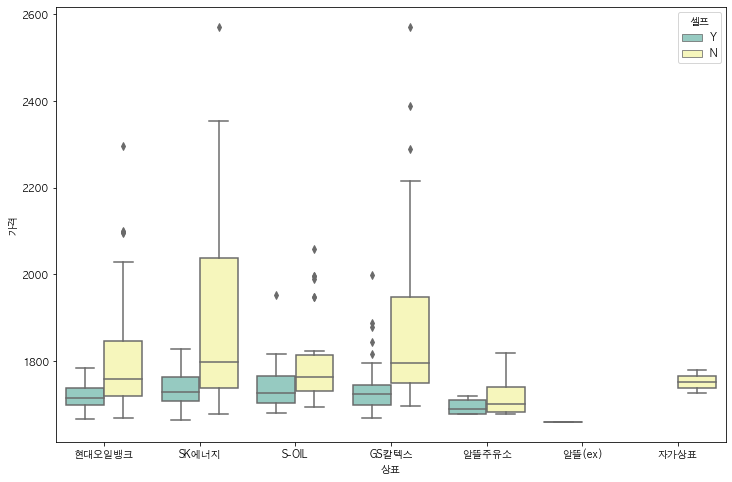

In [86]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

어헛, sk에너지가 상당히 비싸네요. 여기서도 같은 상표라도 셀프 주유소들이 더 싸게 가격이 분포되어 있고요, 알뜰 주유소가 알뜰이라는 이름 답게 싸다는 것 또한 알 수 있네요.

셀프 주유소인지 아닌지는 제외하고 상표로만 boxplot을 보겠습니다.

/Users/ddjinny/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


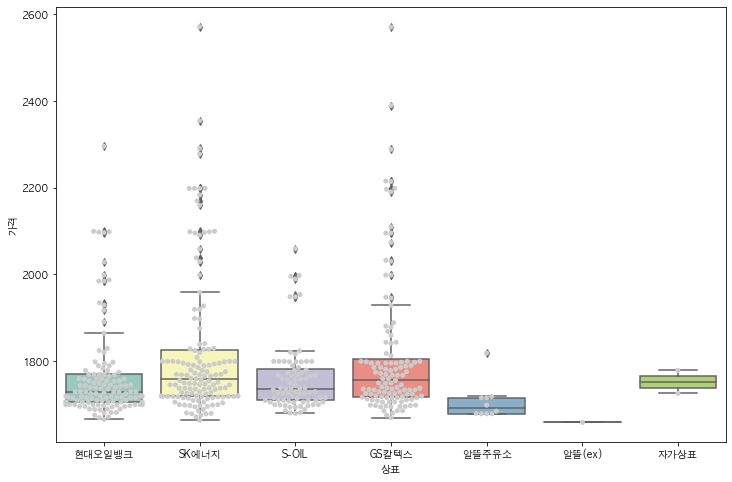

In [87]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.8')  # 1로 하면 환공포증 느낌...
plt.show()

1로 해보세요... 진짜 징그러워요...(소름) 아무튼 알뜰주유소 이용을 추천합니다ㅎㅎ 대기업들은 돈도 많으면서 더 비싸네요😅

결과적으로 '셀프 주유소는 더 저렴한가'는 맞다고 할 수 있네요! 요렇게 팩트체크를 완료해봤습니다.

### 서울시 구별 주유 가격 시각화

여기까지만 하면 아쉽잖아요. 그래서 구별로 가격의 정도를 시각화해보려고 합니다. 그래서 앞서 주소에서 구를 추출한 것이에요. 이전에 사용했던 json, folium, googlemaps를 사용해서 시각화해줄 겁니다. 필요한 모듈을 import 해줄게요.

In [88]:
pip install googlemaps

Note: you may need to restart the kernel to use updated packages.


In [89]:
import json
import folium
import googlemaps
import warnings  # futurewarning 뜨지 않도록! 
warnings.simplefilter(action = "ignore", category = FutureWarning)

가격별로 먼저 제일 비싼곳부터 나열해볼게요. 딱 10개를 가져와보겠습니다.

In [90]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2571.0,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2570.0,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2389.0,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2354.0,N,SK에너지,중구
33,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구
11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구
32,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2215.0,N,GS칼텍스,종로구
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2214.0,N,GS칼텍스,강남구


강남이 비쌀 줄 알았는데, 중구, 용산구 쪽에 비싼 주유소들이 많군요. 중구에는 광화문, 시청 등이 있어서 일까요. 상당히 비싸네요.

다음에는 저의 집이 서대문에 있어서 싼 주소가 어딨는지 알아봤어요.

In [91]:
stations[stations['구'] == '서대문구'].sort_values(by='가격')

,Oil_store,주소,가격,셀프,상표,구
0,삼미상사(주)서부주유소,서울 서대문구 성산로 255,1680.0,Y,SK에너지,서대문구
1,구도일주유소 두꺼비,서울 서대문구 성산로 312,1680.0,Y,S-OIL,서대문구
2,(주)창원이엔지 홍제지점,서울 서대문구 통일로 455 (홍제동),1705.0,N,현대오일뱅크,서대문구
3,(주)미래아스팔트 신우주유소,서울 서대문구 가좌로 106 (홍은동),1707.0,Y,S-OIL,서대문구
4,(주)가재울뉴타운주유소,서울 서대문구 모래내로 205,1713.0,Y,현대오일뱅크,서대문구
5,현대오일뱅크(주)직영 연세주유소,서울 서대문구 연희로 184,1715.0,Y,현대오일뱅크,서대문구
6,행촌제2주유소,서울 서대문구 성산로 490 (대신동),1717.0,N,SK에너지,서대문구
7,남정주유소,서울 서대문구 모래내로 243 (남가좌동),1718.0,N,GS칼텍스,서대문구
8,지에스칼텍스(주)홍제동주유소,서울 서대문구 통일로 372,1733.0,Y,GS칼텍스,서대문구
9,현대오일뱅크㈜직영 독립문주유소,서울 서대문구 통일로 384 (홍제동),1738.0,N,현대오일뱅크,서대문구


오홍, 1번째 index가 우리집과 제일 가까운 곳이네요^6^

서울시에서 가장 낮은 주유소들을 어디에 있는지도 볼게요.

In [92]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1659.0,Y,알뜰(ex),서초구
0,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1663.0,Y,SK에너지,양천구
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665.0,Y,현대오일뱅크,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669.0,N,현대오일뱅크,도봉구
0,수유동주유소,서울 강북구 도봉로 395 (수유동),1669.0,Y,GS칼텍스,강북구
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671.0,Y,SK에너지,도봉구
1,현대오일뱅크(주)직영 양천현대셀프주유소,서울 양천구 안양천로 1179 (목동),1671.0,Y,현대오일뱅크,양천구
0,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1675.0,Y,GS칼텍스,성북구
1,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1675.0,Y,현대오일뱅크,성북구
0,동서울고속주유소,서울 동대문구 한천로 414,1675.0,Y,SK에너지,동대문구


의외로 서초구, 양천구, 도봉구에 많군요!

하지만 단순히 10개의 데이터를 가지고 이런 구들이 비싸다 싸다를 말하긴 힘들죠. 그래서 평균을 내서 대체적인 가격을 비교해보겠습니다.

In [93]:
# pivot table로 평균을 비교해 봅시다
import numpy as np 
gu_data = pd.pivot_table(stations, index=['구'], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1920.617647
강동구,1802.785714
강북구,1696.769231
강서구,1757.718750
관악구,1775.500000


이것을 지도에 시각화해서 나타내보겠습니다.
[서울시 json 파일](https://drive.google.com/file/d/1wAkqegLTvrwB_NlxTy8pBi6hIS5miAyo/view?usp=sharing)을 다운 받고 코드를 작성해주세요!
그리고 json 파일을 저장해주신 디렉토리 경로를 넣어주면 됩니다.

In [97]:
geo_path = '/Users/ddjinny/Documents/programming/Data-Science-Intro/week5/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

오호라 이렇게 하니, 확실히 중구와 용산구가 비싸네요. 거기다 종로구도 무척 비싸고, 강남구도 확실히 비싸네요.

### 서울시 주유 가격 상하위 10개 주유소 지도 시각화

이번에는 서울시에 있는 주유가격 상하위 10개 주유소를 지도에 표시해보도록 하겠습니다. 구별로 따지는게 아니라, 개별 주유소별로 따져보는 거에요. 상하위 10개 주유소만 따로 변수에 담아보겠습니다.

In [98]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2571.0,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2570.0,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2389.0,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2354.0,N,SK에너지,중구
33,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구
11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구
32,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2215.0,N,GS칼텍스,종로구
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2214.0,N,GS칼텍스,강남구


In [99]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1659.0,Y,알뜰(ex),서초구
0,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1663.0,Y,SK에너지,양천구
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665.0,Y,현대오일뱅크,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669.0,N,현대오일뱅크,도봉구
0,수유동주유소,서울 강북구 도봉로 395 (수유동),1669.0,Y,GS칼텍스,강북구
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671.0,Y,SK에너지,도봉구
1,현대오일뱅크(주)직영 양천현대셀프주유소,서울 양천구 안양천로 1179 (목동),1671.0,Y,현대오일뱅크,양천구
0,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1675.0,Y,GS칼텍스,성북구
1,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1675.0,Y,현대오일뱅크,성북구
0,동서울고속주유소,서울 동대문구 한천로 414,1675.0,Y,SK에너지,동대문구


지도에 시각화 하려면 위도와 경도가 필요하니, 구글 맵키를 준비해주시구요.

In [100]:
gmaps_key = "***********"
gmaps = googlemaps.Client(key=gmaps_key)

아래 코드를 입력하면 lat과 lng 정보를 모두 담아 oil_price_top10과 oil_price_bottom10에다 새로운 칼럼으로 담아줍니다. (코드는 교재에 실린 코드와는 다릅니다.)

    혹시 API Error가 발생한다면 최근에 google cloud platform의 약관이 바뀌어서 그럴 수 있습니다. 링크에 들어가서 본인의 구글맵스 플랫폼의 유료 사용 약관에 동의해 줍시다. 우리가 사용하는 정도로는 결재가 되지 않을거예요:)

In [101]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    # 주소를 '(' 기준으로 나눠 첫번째 주소만 가져와라 
    tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
    # tmp_add를 기준으로 주소를 입력해라 
    tmp_map = gmaps.geocode(tmp_add)

    # tmp_map의 첫번째 값에서 'geometry'를 구하고, 거기에서 다시 'location'을 구해라
    tmp_loc = tmp_map[0].get('geometry').get('location')
    lat.append(tmp_loc['lat'])
    lng.append(tmp_loc['lng'])

# 각각 새로운 컬럼 형성 
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

<ipython-input-101-ad0a581241f4>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_top10.index):


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
9,서남주유소,서울 중구 통일로 30,2571.0,N,SK에너지,중구,37.558348,126.972090
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2570.0,N,GS칼텍스,용산구,37.552290,126.968935
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2389.0,N,GS칼텍스,중구,37.560850,126.993653
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2354.0,N,SK에너지,중구,37.561648,126.997142
33,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구,37.517636,127.035756
11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구,37.550179,126.972463
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구,37.511513,127.047093
32,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구,37.511513,127.047093
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2215.0,N,GS칼텍스,종로구,37.560850,126.993653
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2214.0,N,GS칼텍스,강남구,37.501402,127.059066


엇, 그런데 인덱스가 이상하네요. 8이 2번 들어가 있어요.

In [102]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    # 주소를 '(' 기준으로 나눠 첫번째 주소만 가져와라 
    tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
    # tmp_add를 기준으로 주소를 입력해라 
    tmp_map = gmaps.geocode(tmp_add)

    # tmp_map의 첫번째 값에서 'geometry'를 구하고, 거기에서 다시 'location'을 구해라
    tmp_loc = tmp_map[0].get('geometry').get('location')
    lat.append(tmp_loc['lat'])
    lng.append(tmp_loc['lng'])

# 각각 새로운 컬럼 형성 
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

<ipython-input-102-77b146c20610>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_bottom10.index):


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1659.0,Y,알뜰(ex),서초구,37.459906,127.042060
0,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1663.0,Y,SK에너지,양천구,37.459906,127.042060
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665.0,Y,현대오일뱅크,도봉구,37.459906,127.042060
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669.0,N,현대오일뱅크,도봉구,37.674434,127.044051
0,수유동주유소,서울 강북구 도봉로 395 (수유동),1669.0,Y,GS칼텍스,강북구,37.459906,127.042060
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671.0,Y,SK에너지,도봉구,37.645005,127.032098
1,현대오일뱅크(주)직영 양천현대셀프주유소,서울 양천구 안양천로 1179 (목동),1671.0,Y,현대오일뱅크,양천구,37.674434,127.044051
0,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1675.0,Y,GS칼텍스,성북구,37.459906,127.042060
1,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1675.0,Y,현대오일뱅크,성북구,37.674434,127.044051
0,동서울고속주유소,서울 동대문구 한천로 414,1675.0,Y,SK에너지,동대문구,37.459906,127.042060


어, 그런데 하위 10개도 index가 이상하죠. 아마 병합하는 과정에서 인덱스를 재설정하지 않아서 이런 결과가 나타난 것 같아요. 이러면 이후가 문제가 생기게 돼요. 아래처럼 인덱스 별로 위도와 경도를 뽑아보면, 6번째 값부터 이상하게 추출이 되죠? 그러면 Folium에 넣었을 때 오류가 떠요!

In [103]:
for n in oil_price_top10.index:
    print([oil_price_top10['lat'][n], oil_price_top10['lng'][n]])

[37.5583477, 126.9720901]
[37.5522895, 126.9689354]
[8    37.56085
8    37.56085
Name: lat, dtype: float64, 8    126.993653
8    126.993653
Name: lng, dtype: float64]
[37.5616483, 126.9971419]
[37.51763589999999, 127.0357559]
[37.55017850000001, 126.9724626]
[32    37.511513
32    37.511513
Name: lat, dtype: float64, 32    127.047093
32    127.047093
Name: lng, dtype: float64]
[32    37.511513
32    37.511513
Name: lat, dtype: float64, 32    127.047093
32    127.047093
Name: lng, dtype: float64]
[8    37.56085
8    37.56085
Name: lat, dtype: float64, 8    126.993653
8    126.993653
Name: lng, dtype: float64]
[37.5014022, 127.059066]


그래서 이 문제를 해결하기 위해 index를 다시 설정해줍니다.

In [104]:
oil_price_top10.reset_index(inplace=True)
oil_price_top10.drop('index',1,inplace=True)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,서남주유소,서울 중구 통일로 30,2571.0,N,SK에너지,중구,37.558348,126.972090
1,서계주유소,서울특별시 용산구 청파로 367 (청파동),2570.0,N,GS칼텍스,용산구,37.552290,126.968935
2,필동주유소,서울 중구 퇴계로 196 (필동2가),2389.0,N,GS칼텍스,중구,37.560850,126.993653
3,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2354.0,N,SK에너지,중구,37.561648,126.997142
4,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구,37.517636,127.035756
5,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구,37.550179,126.972463
6,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구,37.511513,127.047093
7,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구,37.511513,127.047093
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2215.0,N,GS칼텍스,종로구,37.560850,126.993653
9,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2214.0,N,GS칼텍스,강남구,37.501402,127.059066


In [105]:
for n in oil_price_top10.index:
    print([oil_price_top10['lat'][n], oil_price_top10['lng'][n]])

[37.5583477, 126.9720901]
[37.5522895, 126.9689354]
[37.56084999999999, 126.9936529]
[37.5616483, 126.9971419]
[37.51763589999999, 127.0357559]
[37.55017850000001, 126.9724626]
[37.51151340000001, 127.0470928]
[37.51151340000001, 127.0470928]
[37.56084999999999, 126.9936529]
[37.5014022, 127.059066]


이제 잘 도출이 되네요! 그럼 하위 10개도 제대로 해줍시다.

In [106]:
oil_price_bottom10.reset_index(inplace=True)
oil_price_bottom10.drop('index',1,inplace=True)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1659.0,Y,알뜰(ex),서초구,37.459906,127.042060
1,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1663.0,Y,SK에너지,양천구,37.459906,127.042060
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665.0,Y,현대오일뱅크,도봉구,37.459906,127.042060
3,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669.0,N,현대오일뱅크,도봉구,37.674434,127.044051
4,수유동주유소,서울 강북구 도봉로 395 (수유동),1669.0,Y,GS칼텍스,강북구,37.459906,127.042060
5,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671.0,Y,SK에너지,도봉구,37.645005,127.032098
6,현대오일뱅크(주)직영 양천현대셀프주유소,서울 양천구 안양천로 1179 (목동),1671.0,Y,현대오일뱅크,양천구,37.674434,127.044051
7,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1675.0,Y,GS칼텍스,성북구,37.459906,127.042060
8,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1675.0,Y,현대오일뱅크,성북구,37.674434,127.044051
9,동서울고속주유소,서울 동대문구 한천로 414,1675.0,Y,SK에너지,동대문구,37.459906,127.042060


In [107]:
for n in oil_price_bottom10.index:
    print([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]])

[37.4599063, 127.0420601]
[37.4599063, 127.0420601]
[37.4599063, 127.0420601]
[37.674434, 127.0440507]
[37.4599063, 127.0420601]
[37.6450046, 127.0320982]
[37.674434, 127.0440507]
[37.4599063, 127.0420601]
[37.674434, 127.0440507]
[37.4599063, 127.0420601]


잘 정리되었습니다! 그럼 이제 지도에다 시각화해봅시다! (아래 코드는 교재 코드에요. 교재에서는 혹시나 몰라서 결측값에 대비해 if로 처리해줬어요)

In [108]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map

대체로 '중구','용산구'에 비싼 주유소가 몰려있고, '강북구','성북구'에 싼 주유소가 몰려있다는 것을 확인할 수 있네요!

# 공부를 끝내며

이번 장은 Selenium을 활용하는데 많은 어려움을 겪으셨을 것 같습니다. 웹 드라이버 설치부터 사용까지 쉽지 않으셨을 것이라 생각하는데요! 그래도 여기까지 온 것이면 해결을 다 하셨다는 얘기겠죠? 이렇게 팩트 체크를 해보니 어떠셨나요? 이번 주차도 무척 재미있는 프로젝트였던 것 같습니다. 기존에 익숙했던 pandas, folium, google maps, sns, matplotlib 등은 계속해서 사용할테니 사용법에 익숙해지시면 좋겠네요! 그럼 다음 프로젝트에서 만나요!❤️